In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs


from sklearn.metrics import mean_squared_error

прочитаем данные по потреблению электроэнергии

In [2]:
Path_Energy = 'my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])

data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145374 entries, 2002-01-01 to 2018-08-03
Data columns (total 13 columns):
Time               145374 non-null object
PJME_MW            145374 non-null float64
year               145374 non-null int64
month              145374 non-null int64
dayofmonth         145374 non-null int64
quarter            145374 non-null int64
dayofyear          145374 non-null int64
weekofyear         145374 non-null int64
dayofweek          145374 non-null int64
hour               145374 non-null int64
is_holiday         145374 non-null int64
is_prev_holiday    145374 non-null int64
is_next_holiday    145374 non-null int64
dtypes: float64(1), int64(11), object(1)
memory usage: 15.5+ MB


Сделаем ресемплинг и перейдем от часовых данных к дневным (дневные данные - как среднее по часовым данным)

In [4]:
d_data=data.resample('D').mean()
d_data.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-01,31080.739130,2002.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0,1.0,0.0,0.0
2002-01-02,34261.541667,2002.0,1.0,2.0,1.0,2.0,1.0,2.0,11.5,0.0,0.0,1.0
2002-01-03,34511.875000,2002.0,1.0,3.0,1.0,3.0,1.0,3.0,11.5,0.0,0.0,0.0
2002-01-04,33715.458333,2002.0,1.0,4.0,1.0,4.0,1.0,4.0,11.5,0.0,0.0,0.0
2002-01-05,30405.125000,2002.0,1.0,5.0,1.0,5.0,1.0,5.0,11.5,0.0,0.0,0.0


In [5]:
data.describe()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
count,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000
mean,32079.773047,2009.801340,6.435979,15.722681,2.481241,180.459835,26.218643,2.999168,11.501101,0.027233,0.027075,0.027240
std,6464.167501,4.791885,3.438982,8.801258,1.114448,105.138073,15.019836,1.999572,6.921927,0.162763,0.162303,0.162783
min,14544.000000,2002.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27573.000000,2006.000000,3.000000,8.000000,1.000000,90.000000,13.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,31421.000000,2010.000000,6.000000,16.000000,2.000000,179.000000,26.000000,3.000000,12.000000,0.000000,0.000000,0.000000
75%,35648.750000,2014.000000,9.000000,23.000000,3.000000,271.000000,39.000000,5.000000,18.000000,0.000000,0.000000,0.000000
max,62009.000000,2018.000000,12.000000,31.000000,4.000000,366.000000,53.000000,6.000000,23.000000,1.000000,1.000000,1.000000


Выполним сглаживание дневных данных по потреблению электроэнергии

In [6]:
d_data_ar = d_data['PJME_MW'].values
d_data_s = pd.DataFrame(data = d_data[['PJME_MW']])

In [7]:
d_data_ar

array([31080.73913043, 34261.54166667, 34511.875     , ...,
       39230.79166667, 39593.04166667, 35486.        ])

In [8]:
d_data_s.head()

,PJME_MW
Date,
2002-01-01,31080.739130
2002-01-02,34261.541667
2002-01-03,34511.875000
2002-01-04,33715.458333
2002-01-05,30405.125000


C:\Users\Fujitsu\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


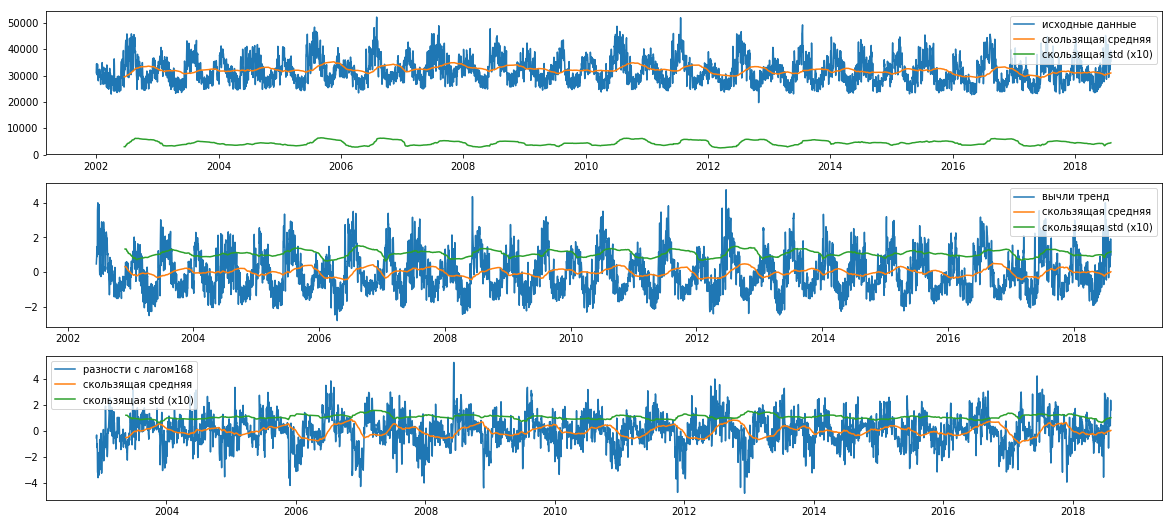

In [9]:
#import matplotlib.dates as mdates
train = d_data_s.iloc[:-10, :]
#print(train)
test = d_data_s.iloc[-10:, :]
#print(test)

N2 = 24*7

d_data_s['z_data'] = (d_data_s['PJME_MW'] - d_data_s['PJME_MW'].rolling(window=N2).mean()) / d_data_s['PJME_MW'].rolling(window=N2).std()
d_data_s['zp_data'] = d_data_s['z_data'] - d_data_s['z_data'].shift(N2)

#print(b_s.z_data)
#print(b_s.zp_data)

def plot_rolling(d_data_s):
    fig, ax = plt.subplots(3,figsize=(20, 9))
    ax[0].plot(d_data_s.index, d_data_s['PJME_MW'], label='исходные данные')
    ax[0].plot(d_data_s['PJME_MW'].rolling(window=N2).mean(), label="скользящая средняя");
    ax[0].plot(d_data_s['PJME_MW'].rolling(window=N2).std(), label="скользящая std (x10)");
    ax[0].legend()

    ax[1].plot(d_data_s.index,d_data_s.z_data, label="вычли тренд")
    ax[1].plot(d_data_s.z_data.rolling(window=N2).mean(), label="скользящая средняя");
    ax[1].plot(d_data_s.z_data.rolling(window=N2).std(), label="скользящая std (x10)");
    ax[1].legend()

    ax[2].plot(d_data_s.index, d_data_s.zp_data, label="разности с лагом" +str(N2))
    ax[2].plot(d_data_s.zp_data.rolling(window=N2).mean(), label="скользящая средняя");
    ax[2].plot(d_data_s.zp_data.rolling(window=N2).std(), label="скользящая std (x10)");
    ax[2].legend()

    #plt.tight_layout()
   #
    plt.show()
plot_rolling(d_data_s)

Скользящее среднее не дает необходимых результатов, попробуем экспоненциальное сглаживание

Text(0.5, 1.0, 'Energy 2010-2019')

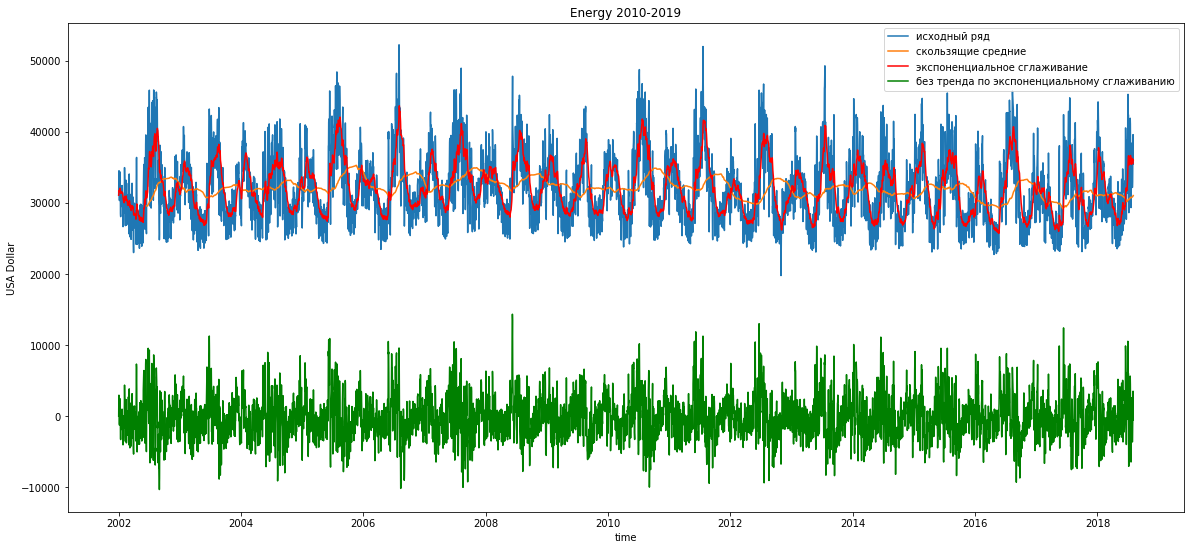

In [10]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

d_data_ar_exp_1 = exponential_smoothing(d_data['PJME_MW'], 0.08)

plt.figure(figsize=(20, 9))
plt.plot(d_data_s.index, d_data_s['PJME_MW'], label='исходный ряд')
plt.plot(d_data_s['PJME_MW'].rolling(window=N2).mean(), label="скользящие средние");

plt.plot(d_data_s.index,d_data_ar_exp_1, color = 'red', label="экспоненциальное сглаживание");
plt.plot(d_data_s.index,d_data_s['PJME_MW'] - d_data_ar_exp_1, color = 'green', label="без тренда по экспоненциальному сглаживанию");
plt.xlabel('time')
plt.ylabel('USA Dollar')
plt.legend()
plt.title('Energy 2010-2019')

В соответствии с тестом ADF получаем стационарный ряд (очень маленькая величина 4.553914576304543e-13)

In [11]:
d_data_ar_exp_1 = pd.DataFrame(data = d_data_ar_exp_1, index = d_data_s.index)
#без тренда 
d_data_trend_free = (d_data_s['PJME_MW'] - d_data_ar_exp_1.iloc[:,0])
d_data_trend_free.head()
DF_brent = sm.tsa.stattools.adfuller(d_data_trend_free , regression = 'ctt')
DF_brent

(-9.170365586681456,
 4.553914576304543e-13,
 33,
 6025,
 {'1%': -4.37305434095676,
  '5%': -3.8333705437821584,
  '10%': -3.5538675485903948},
 106669.89574381092)

Text(0.5, 1.0, 'PJME_MW')

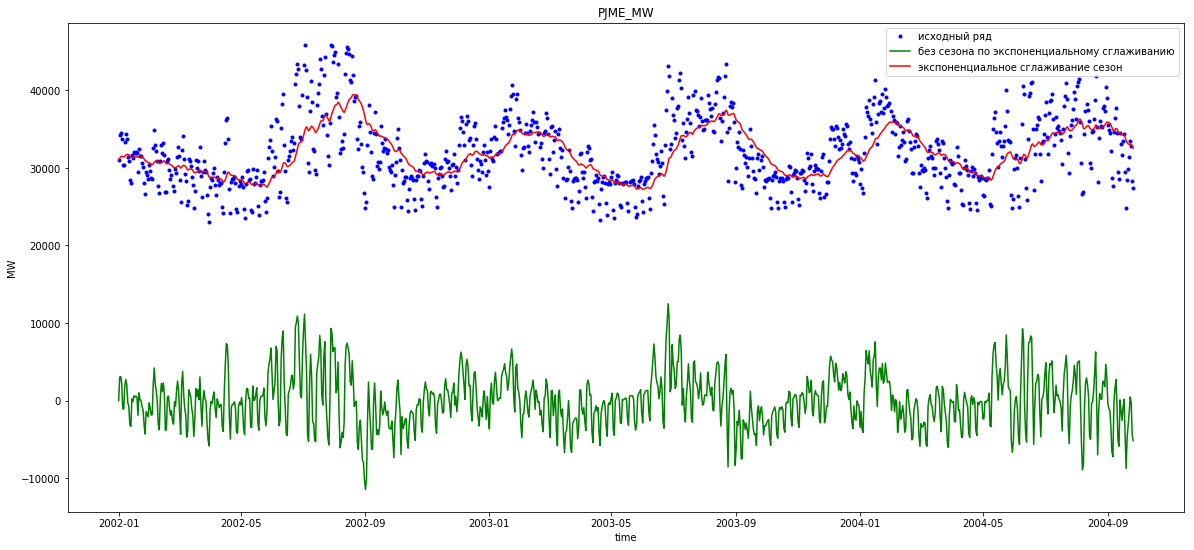

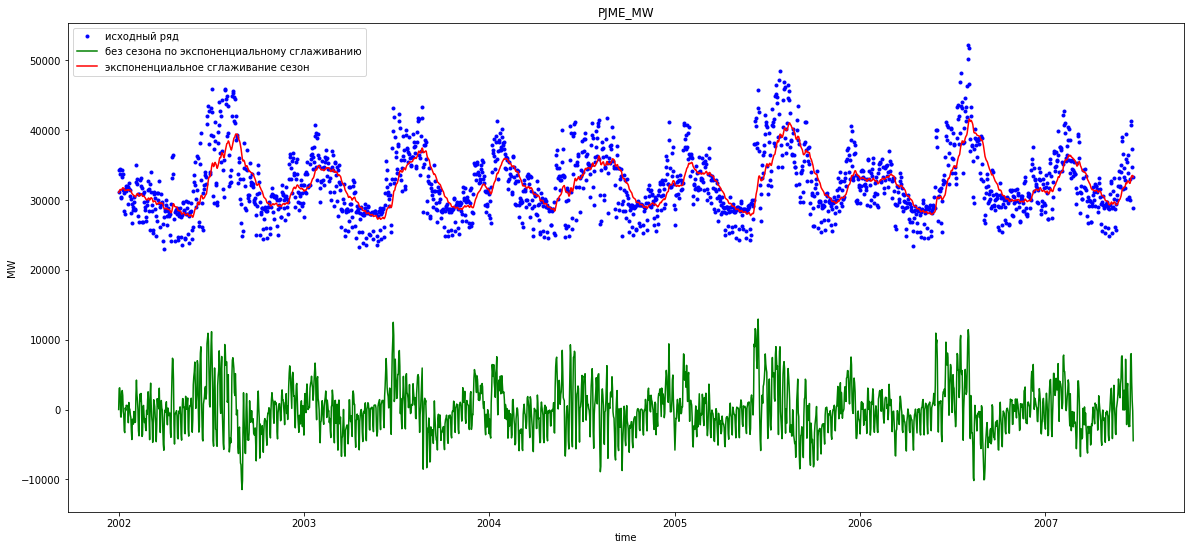

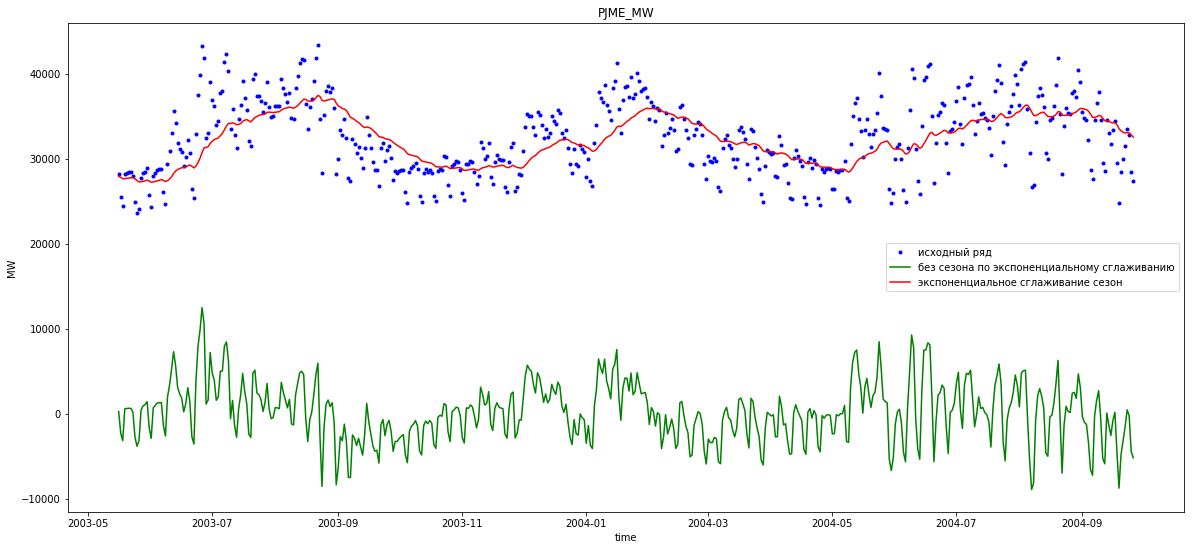

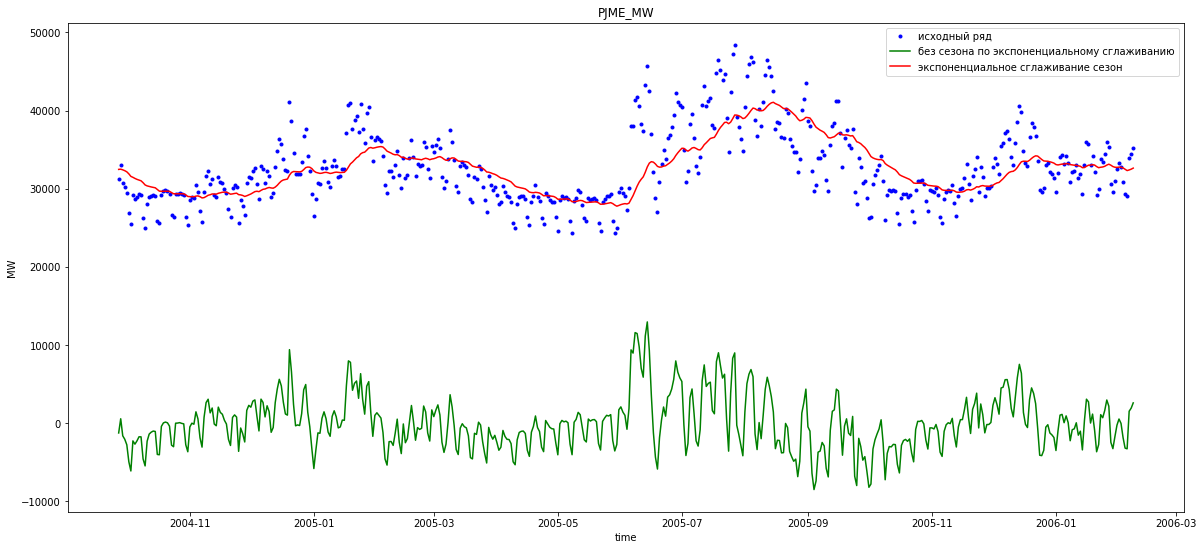

In [12]:
data_exp_1 = exponential_smoothing(d_data['PJME_MW']  , 0.05)

plt.figure(figsize=(20, 9))
plt.plot(d_data.index[:1000], d_data['PJME_MW'].values[:1000], '.b',label='исходный ряд')

plt.plot(d_data.index[:1000],d_data['PJME_MW'].values[:1000] - data_exp_1[:1000] , color = 'green', label="без сезона по экспоненциальному сглаживанию");

plt.plot(d_data.index[:1000],data_exp_1[:1000] , color = 'red', label="экспоненциальное сглаживание сезон");

plt.xlabel('time')
plt.ylabel('MW')
plt.legend()
plt.title('PJME_MW')

plt.figure(figsize=(20, 9))
plt.plot(d_data.index[:2000], d_data['PJME_MW'].values[:2000], '.b',label='исходный ряд')

plt.plot(d_data.index[:2000],d_data['PJME_MW'].values[:2000] - data_exp_1[:2000] , color = 'green', label="без сезона по экспоненциальному сглаживанию");

plt.plot(d_data.index[:2000],data_exp_1[:2000] , color = 'red', label="экспоненциальное сглаживание сезон");

plt.xlabel('time')
plt.ylabel('MW')
plt.legend()
plt.title('PJME_MW')

plt.figure(figsize=(20, 9))
plt.plot(d_data.index[500:1000], d_data['PJME_MW'].values[500:1000], '.b',label='исходный ряд')

plt.plot(d_data.index[500:1000],d_data['PJME_MW'].values[500:1000] - data_exp_1[500:1000] , color = 'green', label="без сезона по экспоненциальному сглаживанию");

plt.plot(d_data.index[500:1000],data_exp_1[500:1000] , color = 'red', label="экспоненциальное сглаживание сезон");

plt.xlabel('time')
plt.ylabel('MW')
plt.legend()
plt.title('PJME_MW')

plt.figure(figsize=(20, 9))
plt.plot(d_data.index[1000:1500], d_data['PJME_MW'].values[1000:1500], '.b',label='исходный ряд')

plt.plot(d_data.index[1000:1500],d_data['PJME_MW'].values[1000:1500] - data_exp_1[1000:1500] , color = 'green', label="без сезона по экспоненциальному сглаживанию");

plt.plot(d_data.index[1000:1500],data_exp_1[1000:1500] , color = 'red', label="экспоненциальное сглаживание сезон");

plt.xlabel('time')
plt.ylabel('MW')
plt.legend()
plt.title('PJME_MW')

Уберем сезонную составляющую и проверим ряд на стационарность

In [13]:
data_season_free = pd.DataFrame(data = (np.array(d_data['PJME_MW']).reshape((d_data['PJME_MW'].shape[0],1)) -data_exp_1))
DF_ = sm.tsa.stattools.adfuller( data_season_free.iloc[:,0] , regression = 'ctt')
DF_

(-8.365362138574472,
 4.2829746150930403e-11,
 34,
 6024,
 {'1%': -4.373054660566805,
  '5%': -3.833370706612336,
  '10%': -3.55386764946938},
 107622.59914749119)

ряд стационарный

In [14]:
df= pd.DataFrame(d_data_ar_exp_1)
df.head()

,0
Date,
2002-01-01,31080.739130
2002-01-02,31335.203333
2002-01-03,31589.337067
2002-01-04,31759.426768
2002-01-05,31651.082627


применим модель авторегрессии.

In [15]:
df['t'] = 0
df.iloc[1:,1]=df.iloc[:-1,0].values
df['t1']=0
df.iloc[2:,2]=df.iloc[:-2,0].values
df['t2']=0
df.iloc[3:,3]=df.iloc[:-3,0].values
df.fillna(0)
# добавили сглаживание (3 вида - просто для коллекции)
df['exp_0_01'] = exponential_smoothing(df[0], 0.01)
df['exp_0_03'] = exponential_smoothing(df[0], 0.03)
df['exp_0_08'] = exponential_smoothing(df[0], 0.08)
# добавим разности - 1-й порядок
df['diff1'] = 0
df['diff1'].iloc[1:] = df.iloc[:-1,0]-df.iloc[1:,0]


df.head()

C:\Users\Fujitsu\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,0,t,t1,t2,exp_0_01,exp_0_03,exp_0_08,diff1
Date,,,,,,,,
2002-01-01,31080.739130,0.000000,0.000000,0.000000,31080.739130,31080.739130,31080.739130,0.0
2002-01-02,31335.203333,31080.739130,0.000000,0.000000,31083.283772,31088.373057,31101.096267,0.0
2002-01-03,31589.337067,31335.203333,31080.739130,0.000000,31088.344305,31103.401977,31140.155531,0.0
2002-01-04,31759.426768,31589.337067,31335.203333,31080.739130,31095.055130,31123.082721,31189.697230,0.0
2002-01-05,31651.082627,31759.426768,31589.337067,31335.203333,31100.615405,31138.922718,31226.608061,0.0


In [16]:
df.columns

Index([0, 't', 't1', 't2', 'exp_0_01', 'exp_0_03', 'exp_0_08', 'diff1'], dtype='object')

Разделим данные на тренировочные и тестовые

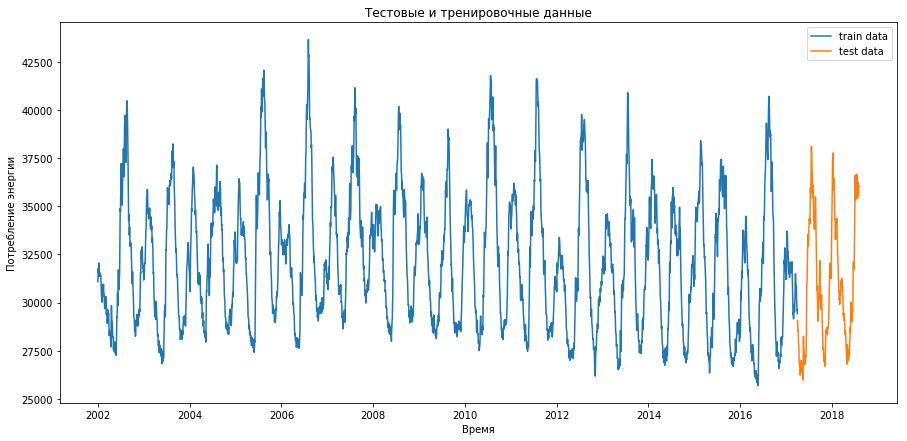

In [17]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
scl =StandardScaler()
scly =StandardScaler()

# сделаем примеры и модель 
def split_data_e( data, split_date ):
    return data.loc[data.index.get_level_values('Date') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Date') >  split_date].copy()

train_e, test_e = split_data_e( df, '04-01-2017')

X_train_e = train_e.iloc[:-1,:]
y_train_e = train_e[df.columns[0]].values[1:]
X_test_e = test_e.iloc[:-1,:]
y_test_e = test_e[df.columns[0]].values[1:]


plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Потребление энергии')
plt.plot(train_e.index.get_level_values('Date'),train_e[df.columns[0]], label='train data' )
plt.plot(test_e.index.get_level_values('Date'),test_e[df.columns[0]], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

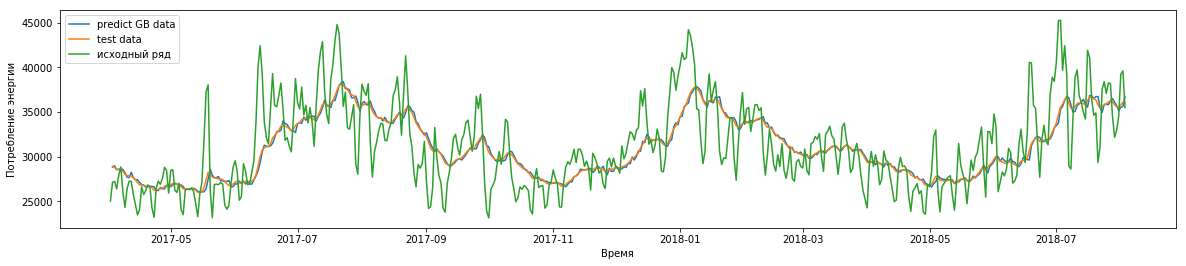

ошибка градиентного бустинга :   0.6588911618498916 %


In [18]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

model_gb = GradientBoostingRegressor(max_depth=15, random_state=0, n_estimators=100)
model_gb.fit( X_train_e, y_train_e ) 
X_test_pred_gb = model_gb.predict(X_test_e)

plt.figure( figsize=( 20, 4 ))

plt.xlabel('Время')
plt.ylabel('Потребление энергии')
plt.plot(test_e.index[1:],X_test_pred_gb, label='predict GB data' )
plt.plot(test_e.index[1:],y_test_e, label='test data')
plt.plot(d_data_s.loc['04-02-2017':].index, d_data_s.loc['04-02-2017':]['PJME_MW'], label='исходный ряд')

plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test_e, y_pred=X_test_pred_gb)

print('ошибка градиентного бустинга :  ', er_g, '%')

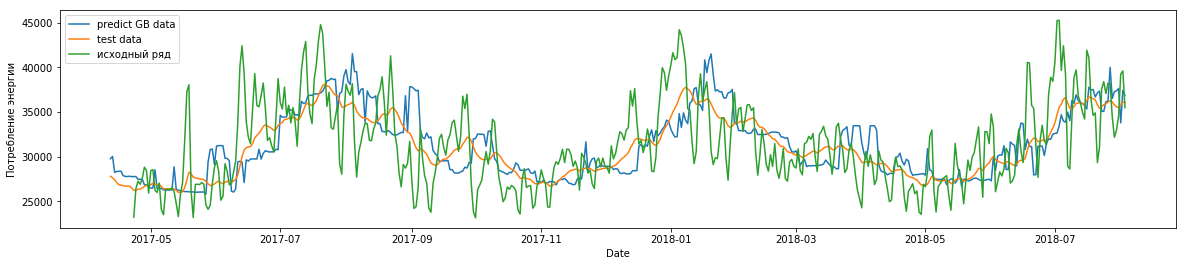

ошибка градиентного бустинга :   4.7445615269191475 %


In [19]:
h=10
X_train_e = train_e.iloc[:-h,:]
y_train_e = train_e[df.columns[0]].values[h:]
X_test_e = test_e.iloc[:-h,:]
y_test_e = test_e[df.columns[0]].values[h:]

model_gb.fit( X_train_e, y_train_e ) 
X_test_pred_gb = model_gb.predict(X_test_e)

plt.figure( figsize=( 20, 4 ))

plt.xlabel('Date')
plt.ylabel('Потребление энергии')
plt.plot(test_e.index[h:],X_test_pred_gb, label='predict GB data' )
plt.plot(test_e.index[h:],y_test_e, label='test data')
plt.plot(d_data_s.loc['04-23-2017':].index, d_data_s.loc['04-23-2017':]['PJME_MW'], label='исходный ряд')

plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test_e, y_pred=X_test_pred_gb)

print('ошибка градиентного бустинга :  ', er_g, '%')

Значение ошибки значительно увеличилось при увелечении числа шагов до 20, модель не очень хорошо описывает стохастические данные 

4. Попробуйте предположить характер ряда (стационарный или нет, с трендом, с сезоном, с циклом) для рядов из списка и аргументируйте свой ответ (одна строка):

а) Изменение температуры за окном :).
    Температура имеет ярко выраженный циклический характер (день/ночь), а средняя температура имеет цикличность по временам года и выраженный тренд увеличения средней температуры от зимы к лету и обратная зависимость от лета к зиме.

б) Количество денег, которые тратят покупатели в интернет магазине.
    Цикл -день/ночь (больше покупок делается в дневные часы), есть сезонность связанная с календарем праздников (количество покупок растет в предпраздничные дни).

в) Вес растущего котенка.
   вес котенка имеет тренд (рост веса) в первые месяцы жизни, а затем становится стабильный с незначительными колебаниями.
   Должны быть колебания веса по сезонам - теплая часть (весна и лето) и холодная (осень и зима), особенно если котенок в теплые время больше гуляет, а в холодное находится в помещении.

г) Прирост объема деревьев в лесу от времени
   Выраженная сезонность связанная с посадки деревьев весной и ростом деревьев весной и летом, и уменьшением роста осенью и зимой